In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
dataset=pd.read_csv('advertising.csv')

In [3]:
dataset.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
dataset.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


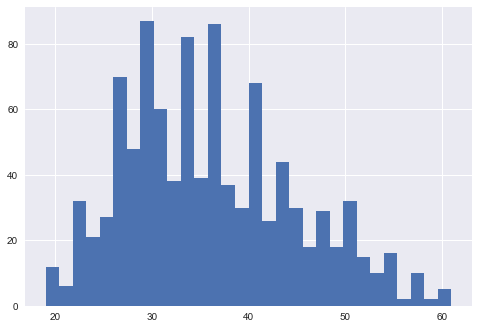

In [6]:
dataset['Age'].hist(bins=30)

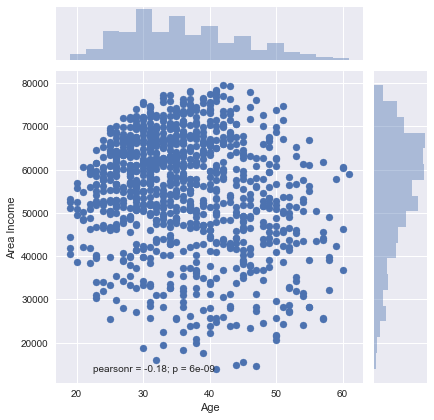

In [7]:
#Create a jointplot showing Area Income versus Age.
sns.jointplot(x='Age',y='Area Income',data=dataset)

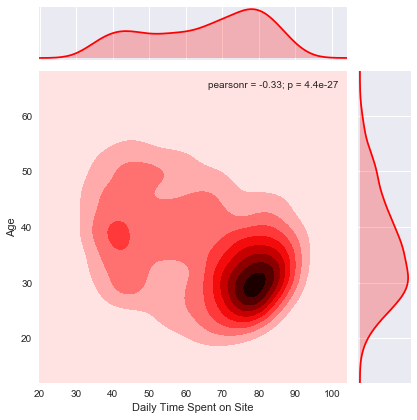

In [8]:
sns.jointplot(x='Daily Time Spent on Site',y='Age',data=dataset,kind='kde',color='red')

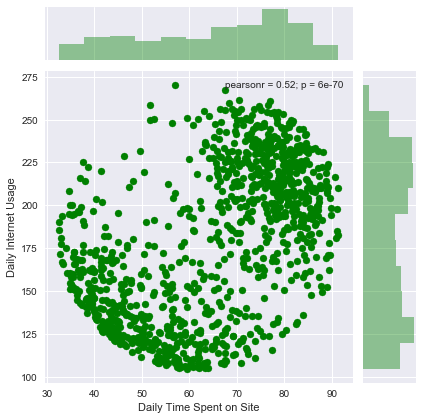

In [9]:
#Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=dataset,color='green')

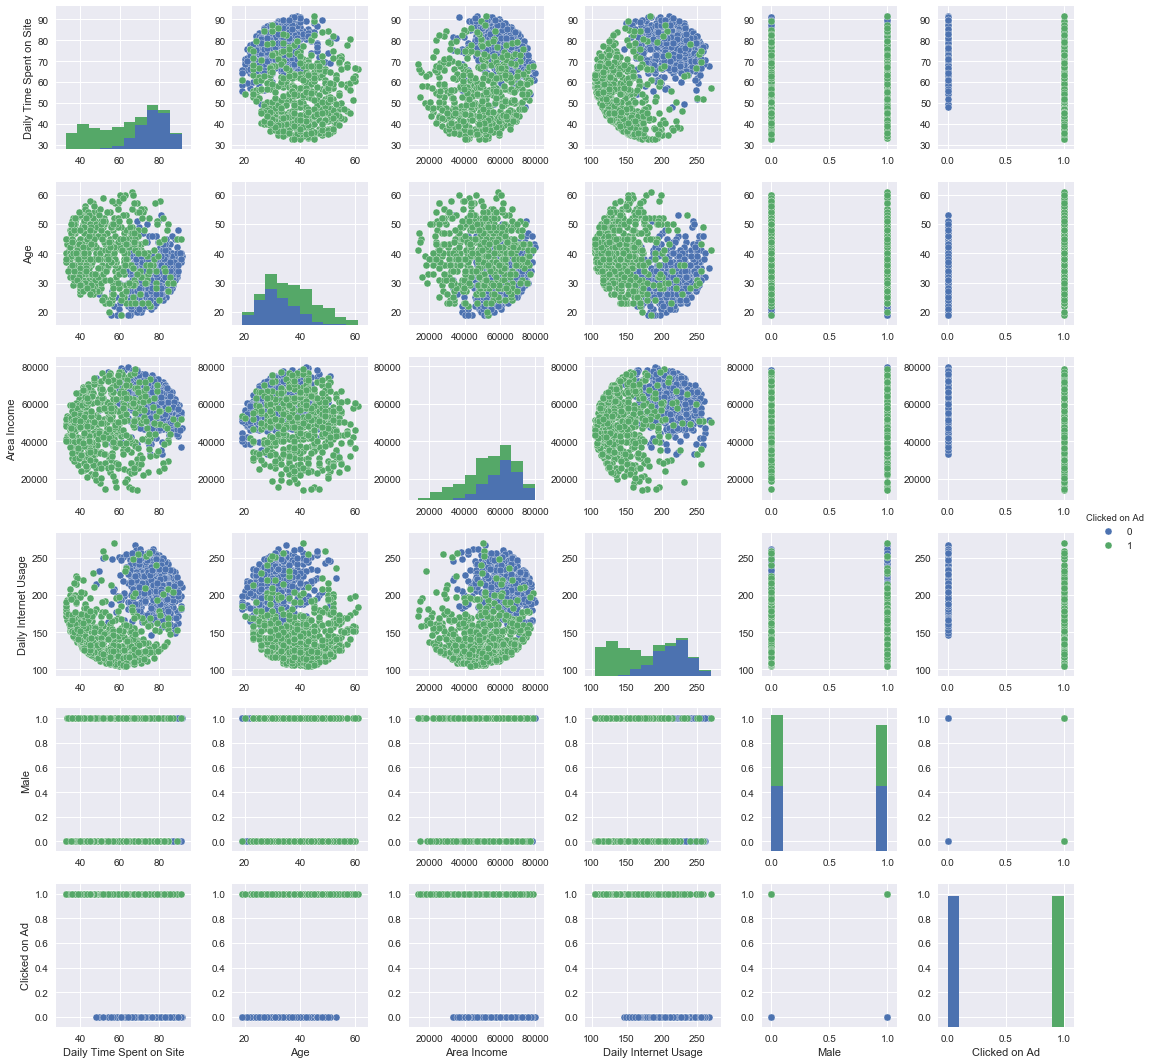

In [10]:
#Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.
sns.pairplot(data=dataset,hue='Clicked on Ad')

In [11]:
from sklearn.model_selection import train_test_split
x = dataset[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = dataset['Clicked on Ad']

In [12]:
x_train,x_test,y_train,y_test=train_test_split( x, y, test_size=0.25, random_state=101)

In [13]:
from sklearn.linear_model import  LogisticRegression

In [14]:
classifier=LogisticRegression()

In [15]:
classifier.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
y_predict=classifier.predict(x_test)

In [17]:
from sklearn.metrics import classification_report,confusion_matrix

In [18]:
print(classification_report(y_test,y_predict))

             precision    recall  f1-score   support

          0       0.90      0.95      0.92       134
          1       0.94      0.88      0.91       116

avg / total       0.92      0.92      0.92       250



In [19]:
result=confusion_matrix(y_test,y_predict)

In [20]:
result

array([[127,   7],
       [ 14, 102]], dtype=int64)

In [21]:
result=result[0][0] +result[1][1]

In [22]:
result

229

In [23]:
probability=229/250

In [24]:
probability

0.916

In [27]:
#

In [ ]:
pd.crosstab()